[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/lacouth/metodos_20191/master)

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [3]:
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np

## Fontes de dados


### https://www.kaggle.com/
### http://dados.gov.br/
### https://www.ibge.gov.br/
### https://archive.ics.uci.edu/ml/index.php 

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados Local

In [4]:
dados = pd.read_csv("../Dados/Consumo_cerveja.csv", sep=";")

## Leitura dos dados no Google Colab

In [5]:
# from google.colab import files
# uploaded = files.upload()

In [6]:
# dados = pd.read_csv("Consumo_cerveja.csv", sep=";")

## Visualizar os dados

In [8]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


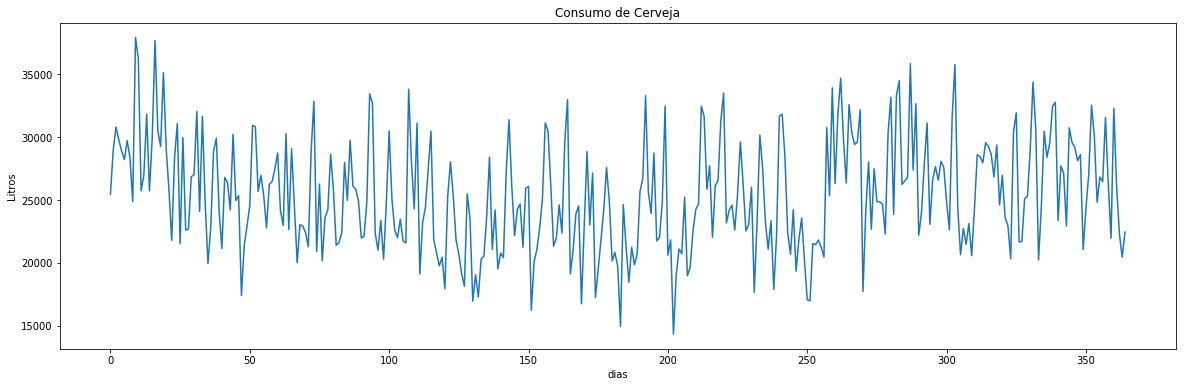

In [4]:
plot.figure(figsize=(20,6))
plot.plot(dados['consumo'])
plot.title('Consumo de Cerveja')
plot.xlabel('dias')
plot.ylabel('Litros')
plot.show()

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

In [10]:
import seaborn as sns

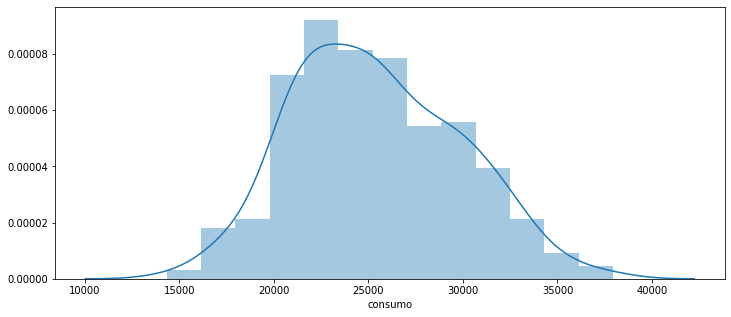

In [11]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12,5)


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [12]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Visualizar as relações entre os dados

### Temperatura máxima vs Consumo

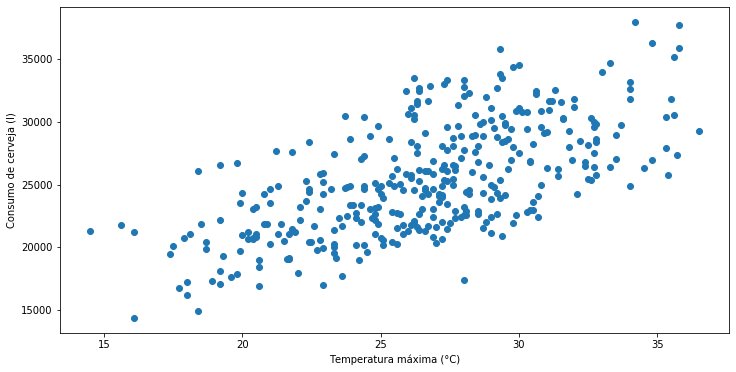

In [13]:
plot.figure(figsize=(12,6))
plot.plot(dados['temp_max'],dados['consumo'],'o')
plot.xlabel('Temperatura máxima (°C)')
plot.ylabel('Consumo de cerveja (l)')
plot.show()

### Temperatura mínima vs Consumo

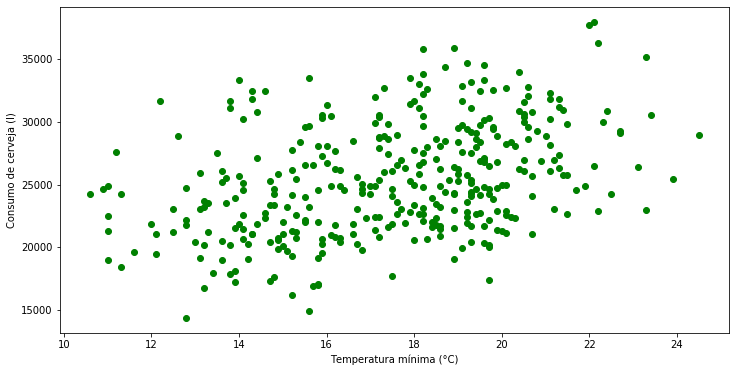

In [14]:
plot.figure(figsize=(12,6))
plot.plot(dados['temp_min'],dados['consumo'],'go')
plot.xlabel('Temperatura mínima (°C)')
plot.ylabel('Consumo de cerveja (l)')
plot.show()

### Temperatura média vs Consumo

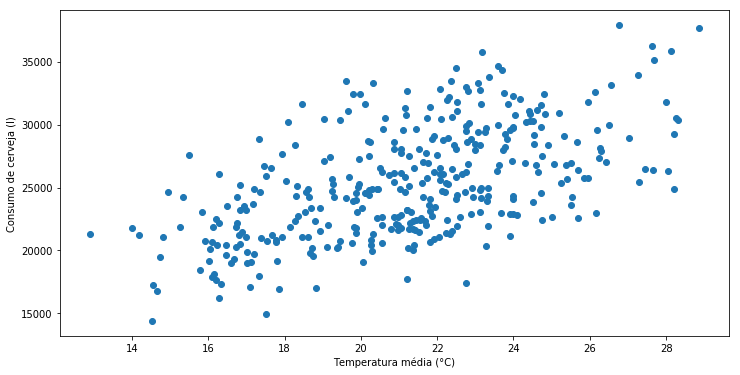

In [23]:
plot.figure(figsize=(12,6))
plot.plot(dados['temp_media'],dados['consumo'],'o')
plot.xlabel('Temperatura média (°C)')
plot.ylabel('Consumo de cerveja (l)')
plot.show()

### Chuva vs Consumo

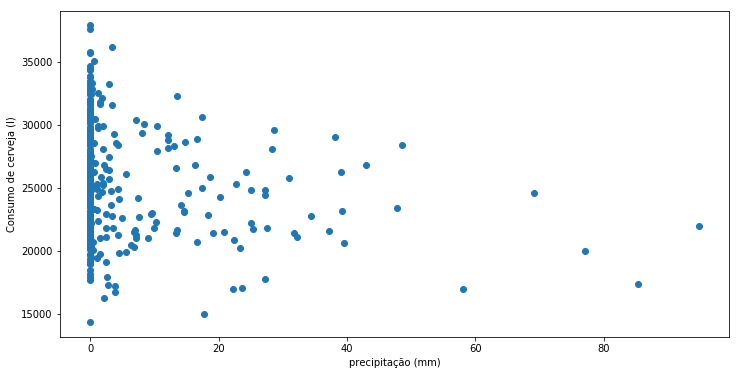

In [24]:
plot.figure(figsize=(12,6))
plot.plot(dados['chuva'],dados['consumo'],'o')
plot.xlabel('precipitação (mm)')
plot.ylabel('Consumo de cerveja (l)')
plot.show()

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## Estudo das relações do consumo com uma váriavel
<hr>

In [81]:
from sklearn import metrics

In [25]:
def coeficientes_reg_linear(x,y):
    m = x.shape[0]
    sum_xi = np.sum(x)
    sum_xi2 = np.sum(x**2)
    sum_yi = np.sum(y)
    sum_xiyi = np.sum(x*y)
    return np.linalg.solve([[m,sum_xi],[sum_xi,sum_xi2]],[sum_yi,sum_xiyi])


### Relação Consumo x Temperatura Máxima

7974.939379459213 + 654.8455839988248x


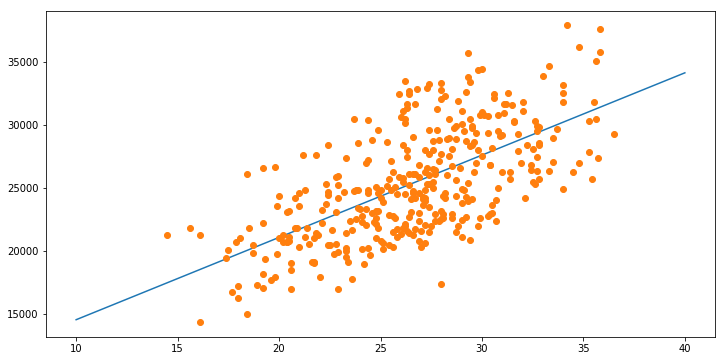

In [29]:
a0,a1 = coeficientes_reg_linear(dados['temp_max'],dados['consumo'])
temp = np.linspace(10,40,100)
consumo = a0+a1*temp
print(f'{a0} + {a1}x')
plot.figure(figsize=(12,6))
plot.plot(temp,consumo)
plot.plot(dados['temp_max'],dados['consumo'],'o')
plot.show()

In [27]:
def consumo_temperatura(temp):
    return a0+a1*temp

In [28]:
consumo_temperatura(30).round(2)

27620.31

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [82]:
y_previsto = consumo_temperatura(dados['temp_max'])
metrics.r2_score(dados['consumo'],y_previsto)

0.41302790995336314

### Relação Consumo x Chuva

Text(0, 0.5, 'consumo (L)')

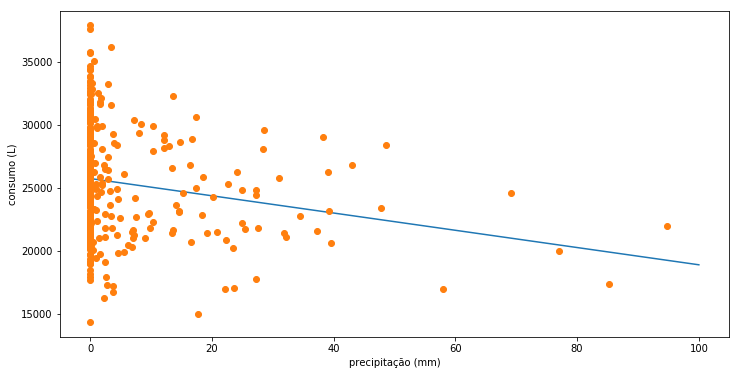

In [33]:
b0, b1 = coeficientes_reg_linear(dados['chuva'],dados['consumo'])
chuva = np.linspace(0,100,100)
consumo_chuva = b0+b1*chuva

plot.figure(figsize=(12,6))
plot.plot(chuva,consumo_chuva)
plot.plot(dados['chuva'],dados['consumo'],'o')
plot.xlabel('precipitação (mm)')
plot.ylabel('consumo (L)')

In [86]:
def consumo_x_chuva(chuva):
    return b0+b1*chuva

In [87]:
y_previsto = consumo_x_chuva(dados['chuva'])
metrics.r2_score(dados['consumo'],y_previsto)

0.037552356536804665

## Estudo das relações do consumo com mais de uma váriavel

## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [36]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [37]:
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [38]:
X = dados[['temp_max','chuva','fds']]

## Criando os datasets de treino e de teste

In [106]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [107]:
X_train.shape

(255, 3)

In [108]:
X_test.shape

(110, 3)

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [109]:
from sklearn.linear_model import LinearRegression

## Instanciando a classe *LinearRegression()*

In [110]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [111]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [112]:
modelo.score(X_train,y_train)

0.7051672701607923

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [113]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [115]:
metrics.r2_score(y_test,y_previsto)

0.7487244453450828

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [117]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
193,28.7,0.0,0


## Gerando previsão pontual

In [118]:
modelo.predict(entrada)

array([25554.14149914])

## Criando um simulador simples

In [123]:
temp_max = 35
chuva = 0
fds = 1
entrada = [[temp_max,chuva,fds]]
print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

35094.52 litros


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [125]:
modelo.intercept_.round(2)

6396.17

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [127]:
modelo.coef_.round(2)

array([ 667.52,  -53.06, 5334.97])

In [128]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>6396,17 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>667,52 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-53.06 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5334,97 litros</b>.
</p>